In [3]:
import matplotlib.pyplot as plt
import cv2

import skimage
from skimage import data, io
from skimage.exposure import rescale_intensity

import numpy as np

0.07617926748875342


None

NO CONDENSATION


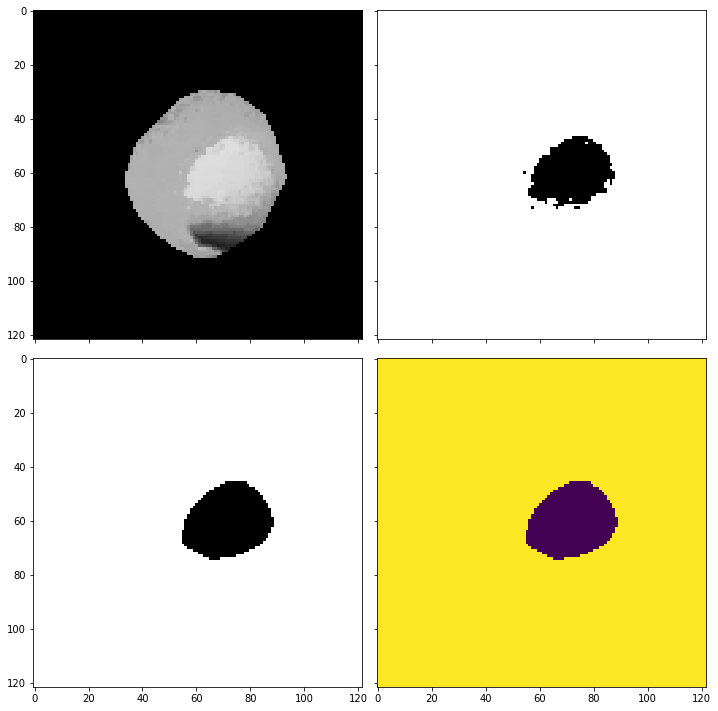

In [56]:
from skimage.measure import label, regionprops_table, regionprops
import pandas as pd

def get_nb_black_pixels_in_image(image):
    return np.count_nonzero(image == 0)

def read_image(path):
    image = cv2.imread(path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def find_medium_sized_hull_or_larger(image):
    contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    hulls = [cv2.convexHull(contour, False) for contour in contours]
    hulls_areas = [cv2.contourArea(hull) for hull in hulls]

    medium_sized_hulls = [hull for hull, area in zip(hulls, hulls_areas) if 5*5 <= area <= 50*50]
    medium_sized_hulls_areas = [cv2.contourArea(hull) for hull in medium_sized_hulls]
    
    return medium_sized_hulls, medium_sized_hulls_areas


def infer_condensation(path):
    image_with_condensation = read_image(path)
    image_with_condensation = np.where(image_with_condensation==255, 0, image_with_condensation)
    _, image_with_condensation_binary = cv2.threshold(image_with_condensation, 190, 255, cv2.THRESH_BINARY)

    pixels_on_the_condensation = cv2.bitwise_and(image_with_condensation, image_with_condensation_binary)
    pixels_on_the_condensation = np.where(pixels_on_the_condensation==0, 255, pixels_on_the_condensation)
    pixels_on_the_condensation = np.where(pixels_on_the_condensation<255, 0, pixels_on_the_condensation)
    
    medium_sized_hulls, medium_sized_hulls_area = find_medium_sized_hull_or_larger(pixels_on_the_condensation)
    
    image_with_big_blank_hulls_only = image_with_condensation_binary.copy()
    image_with_big_blank_hulls_only[:] = 255
    cv2.drawContours(image_with_big_blank_hulls_only, medium_sized_hulls, -1, (0,255,0), thickness=cv2.FILLED)
    
    label_img = label(image_with_big_blank_hulls_only)
    regions = regionprops(label_img)
    
    has_circle_like_
    
    for region in regions:
        print(region["eccentricity"])

    
    circles=cv2.HoughCircles(pixels_on_the_condensation,cv2.HOUGH_GRADIENT,1,20,param1=40, param2=70,minRadius=10,maxRadius=0)
    display(circles)

    nb_black_pixels_in_image = get_nb_black_pixels_in_image(pixels_on_the_condensation)

    if nb_black_pixels_in_image == 0:
        print("CONDENSATION")
    else:
        print("NO CONDENSATION")
        
    fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10, 10))
    ax = axes.ravel()
    ax[0].imshow(cv2.cvtColor(image_with_condensation, cv2.COLOR_GRAY2BGR))
    ax[1].imshow(cv2.cvtColor(pixels_on_the_condensation, cv2.COLOR_GRAY2BGR))
    ax[2].imshow(cv2.cvtColor(image_with_big_blank_hulls_only, cv2.COLOR_GRAY2BGR))
    ax[3].imshow(label_img)
    fig.tight_layout()
    plt.show()
    
infer_condensation("/home/leandro/git/amygda/examples/sample-images/05/debug_images/well_0_3_cropped.chosen_hull.cropped.png")

In [5]:
# from http://www.geekviewpoint.com/python/dynamic_programming/lds

#=======================================================================
# Author: Isai Damier
# Title: Longest Decreasing Subsequence
# Project: geekviewpoint
# Package: algorithms
#
# Statement:
#   Given a sequence of numbers, find a longest decreasing subsequence.
#
#
#  Time Complexity: O(n^2)
#
# Sample Input: [5,0,3,2,1,8]
# Sample Output: [5,3,2,1]
#
# DEFINITION OF SUBSEQUENCE:
#   A sequence is a particular order in which related objects follow
#   each other (e.g. DNA, Fibonacci). A sub-sequence is a sequence
#   obtained by omitting some of the elements of a larger sequence.
#
#   SEQUENCE       SUBSEQUENCE     OMISSION
#   [3,1,2,5,4]     [1,2]            3,5,4
#   [3,1,2,5,4]     [3,1,5]          2,4
#
#   SEQUENCE       NOT SUBSEQUENCE   REASON
#   [3,1,2,5,4]     [4,2,5]           4 should follow 5
#
# STRATEGY:
#   Illustrating by finding
#   a longest decreasing subsequence of [5,0,3,2,1,8]:
#
#   - Start by finding all subsequences of size 1: [5],[0],[3],[2],[1],[8];
#     each element is its own decreasing subsequence.
#
#   - Since we already have the solutions for the size 1 subsequences,
#     we can use them in solving for the size two subsequences. For
#     instance, we already know that 5 is the smallest element of a
#     decreasing subsequence of size 1, i.e. the subsequence [5].
#     Therefore, all we need to get a subsequence of size 2 is add an
#     element smaller than 5 to [5]: [5,0], [5,3], [5,2], [5,1];
#     [3,2], [3,1], [2,1].
#
#   - Now we use the size 2 solutions to get the size 3 solutions:
#     [5,3,2], [5,3,1], [3,2,1]
#
#   - Then we use the size 3 solutions to get the size 4 solutions:
#     [5,3,2,1]. Since there are no size 5 solutions, we are done.
#
# SUMMARY:
#   Instead of directly solving the big problem, we solved a smaller
#   version and then 'copied and pasted' the solution of the subproblem
#   to find the solution to the big problem. To make the 'copy and paste'
#   part easy, we use a table (i.e. list) to track the subproblems
#   and their solutions. This strategy as a whole is called Dynamic
#   Programming. The tabling part is known as memoization, which means
#   writing memo.
#
#   To recognize whether you can use dynamic programming on a problem,
#   look for the following two traits: optimal substructures and
#   overlapping subproblems.
#
#   Optimal Substructures: the ability to 'copy and paste' the solution
#     of a subproblem plus an additional trivial amount of work so to
#     solve a larger problem. For example, we were able to use [5,3]
#     itself an optimal solution to the problem [5,0,3] to get [5,3,2]
#     as an optimal solution to the problem [5,0,3,2].
#
#   Overlapping Subproblems: Okay. So in our approach the solution grew
#     from left to right: [5] to [5,3] to [5,3,2] etc. But in reality
#     we could have solved the problem using recursion trees so that
#     for example [5,3] could be reached either from [5] or from [3].
#     That wouldn't really be a problem except we would be solving for
#     [5,3] more than once. Any time a recursive solution would lead to
#     such overlaps, the bet is dynamic programming is the way to go.
#
#          [5]                 [3]
#         / | \               / | \
#        /  |  \             /  |  \
#       /   |   \           /   |   \
#   [5,0] [5,3] [5,2]   [5,3] [3,2] [3,1]
#
# NOTE:
# Dynamic Programming = Optimal Substructures + Overlapping Subproblems
# Divide and Conquer = Optimal Substructures - Overlapping Subproblems
#   see merge sort: http://www.geekviewpoint.com/python/sorting/mergesort
#
# Alternate coding: Not really much difference here, just another code
#   that some readers will find more intuitive:
#
#      m = [1] * len( A )
#
#      for x in range(len(A)):
#        for y in range(x):
#         if m[y] >= m[x] and A[y] > A[x]:
#           m[x]+=1
#
#      max_value = max(m)
#
#      result = []
#      for i in range(m-1,-1,-1):
#        if max == m[i]:
#          result.append(A[i])
#          max-=1
#
#      result.reverse()
#      return result
#=======================================================================
  
def LDS(A, accept_equals=False):
    m = [0] * len( A ) # starting with m = [1] * len( A ) is not necessary
    for x in range( len( A ) - 2, -1, -1 ):
        for y in range( len( A ) - 1, x, -1 ):
            if m[x] <= m[y] and (A[x] > A[y] or (accept_equals and A[x] >= A[y])):
                m[x] = m[y] + 1 # or use m[x]+=1
    max_value = max( m ) + int(accept_equals)
    return max_value


In [ ]:
import imutils


def get_nb_of_black_pixels_in_each_row (image):
    nb_of_black_pixels_in_each_row = []
    for row in image:
        nb_of_black_pixels = np.count_nonzero(row == 0)
        nb_of_black_pixels_in_each_row.append(nb_of_black_pixels)
    return nb_of_black_pixels_in_each_row

def get_probability_of_condensation_of_single_image(image):
    nb_of_black_pixels_in_each_row = get_nb_of_black_pixels_in_each_row(image)

    # discretize the values
    nb_of_black_pixels_in_each_row = [int(nb/3)*3 for nb in nb_of_black_pixels_in_each_row]
    
    # remove zero values
    nb_of_black_pixels_in_each_row = [nb for nb in nb_of_black_pixels_in_each_row if nb>0]
    nb_of_rows_with_black_pixels = len(nb_of_black_pixels_in_each_row)
    
    if nb_of_rows_with_black_pixels == 0:
        return 0.0
    
    lds = LDS(nb_of_black_pixels_in_each_row)
    lnis = LDS(nb_of_black_pixels_in_each_row, accept_equals=True)

#     print(f"nb_of_black_pixels_in_each_row = {nb_of_black_pixels_in_each_row}")
#     print(f"nb_of_rows_with_black_pixels = {nb_of_rows_with_black_pixels}")
#     print(f"lds = {lds}")
#     print(f"lnis = {lnis}")
    
    not_many_decreasing = lds/lnis < 0.4
    if not_many_decreasing:
        return 0.0

    return lnis / nb_of_rows_with_black_pixels


def get_probability_of_condensation(image, hull):
    image_with_hulls  = image.copy()
    image_with_hulls[:] = 255
    cv2.drawContours(image_with_hulls, [hull], -1, 0, -1)
    
    probabilities_rotated_image = []
    for angle in np.arange(0, 360, 1):
        rotated = imutils.rotate(image_with_hulls, angle)
        
        #TODO: fix black edges
        
        cv2.imshow("Rotated (Problematic)", rotated)
        cv2.waitKey(0)
        probabilities_rotated_image.append(get_probability_of_condensation_of_single_image(rotated))
    
    return max(probabilities_rotated_image)
    
    
    


def infer_condensation(path):
    # TODO: rotate the image in all angles, and search for condensation
    # TODO: add area constraint
    image = read_image(path)
    _, image_binarised = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
    io.imshow(image_binarised)                         
    nb_of_black_pixels_in_each_row = get_nb_of_black_pixels_in_each_row(image_binarised)
    
    # TODO: remove lines with few black pixels from each filled contour, not the whole image
    for index_row, nb_of_black_pixels in enumerate(nb_of_black_pixels_in_each_row):
        if nb_of_black_pixels <= 3:
            image_binarised[index_row,:] = 255
    contours, _ = cv2.findContours(image_binarised, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    hulls = [cv2.convexHull(contour, False) for contour in contours]
    hulls_areas = [cv2.contourArea(hull) for hull in hulls]

    medium_sized_hulls = [hull for hull, area in zip(hulls, hulls_areas) if 5*5 <= area <= 50*50]
    medium_sized_hulls_areas = [cv2.contourArea(hull) for hull in medium_sized_hulls]

    
    probability_of_condensation_for_each_hull = [0.0] + [get_probability_of_condensation(image, hull) for hull in medium_sized_hulls]
    return max(probability_of_condensation_for_each_hull)
    
#     max_probability_of_condensation = 0
#     if len(medium_sized_hulls):
#         for hull, area in zip(medium_sized_hulls, hulls_areas):
                
#             ((x, y), (w, h), angle) = cv2.minAreaRect(hull)
#             area_of_rectangle = w*h
#             ratio_hull_over_rectangle = area_of_hull / area_of_rectangle
#             expected_ratio = math.pi / 4
#             ratio_hull_over_rectangle_normalized = ratio_hull_over_rectangle/expected_ratio
#             probability_of_condensation = 1.0 - abs(ratio_hull_over_rectangle_normalized - 1.0)
#             print(f"Ratio area_of_hull / area_of_rectangle = {ratio_hull_over_rectangle}")
#             print(f"Expected ratio = {expected_ratio}")
#             print(f"Probability it is a condensation: {probability_of_condensation}")
#             max_probability_of_condensation = max(max_probability_of_condensation, probability_of_condensation)
#             print(nb_of_black_pixels_in_each_row)
#             io.imshow(image_with_hulls)
#             plt.show()
#             input()
#   return max_probability_of_condensation

infer_condensation("/home/leandro/git/amygda/examples/condensation/debug_images/well_0_7_cropped.chosen_hull.cropped.png")

In [33]:
import cv2
import numpy as np



def detect(image):
    contours, hierarchies = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#     hulls = [cv2.convexHull(contour, False) for contour in contours]
#     contours = hulls
    medium_sized_contours = [cnt for cnt in contours if 5*5 <= cv2.contourArea(cnt) <= 50*50]
    
    for cnt in medium_sized_contours:
        cnt_len = cv2.arcLength(cnt, True)
        cnt = cv2.approxPolyDP(cnt, 0.1*cnt_len, True)
        if len(cnt) == 3 and cv2.isContourConvex(cnt):
            # print(f"cnt: {cnt}")
            return True
    return False

def read_image(path):
    image = cv2.imread(path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# def get_normalized_image_on_contour(image):
#     cnts, hierarchies = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#     cnt_areas = [cv2.contourArea(cnt) for cnt in cnts]
#     smallest_cnt_area = min(cnt_areas)
#     smallest_contour = [cnt for cnt in cnts if cv2.contourArea(cnt) == smallest_cnt_area]
#     assert len(smallest_contour) == 1
#     smallest_contour = smallest_contour[0]
#     bounding_rect = cv2.boundingRect(smallest_contour)
#     img_cropped_bounding_rect = image[bounding_rect[1]:bounding_rect[1] + bounding_rect[3], bounding_rect[0]:bounding_rect[0] + bounding_rect[2]]
#  area   # resize all to same size
#     img_resized = cv2.resize(img_cropped_bounding_rect, (300, 300))
#     return img_resized


# def get_half_circle_images():
#     image = np.zeros((101,101), dtype=np.uint8)
#     image[:] = 255
#     cv2.circle(image, (50,50), 40, 0, -1)

#     half_circle_images = []
#     for half_circle_height in range(50, 51, 10):
#         half_circle_image = image.copy()
#         half_circle_image[:half_circle_height, :]=255
#         normalized_image_on_contour = get_normalized_image_on_contour(half_circle_image)
#         # io.imshow(normalized_image_on_contour)
#         half_circle_images.append(normalized_image_on_contour)
    
#     return half_circle_images

# def get_probability_of_condensation(image, hull):
#     image_with_hulls  = image.copy()
#     image_with_hulls[:] = 255
#     cv2.drawContours(image_with_hulls, [hull], -1, 0, -1)
#     image_with_hulls = get_normalized_image_on_contour(image_with_hulls)
#     io.imshow(image_with_hulls)
    
#     half_circle_images = get_half_circle_images()
#     probabilities_of_condensation = [0.0]
#     for half_circle_image in half_circle_images:
#         for match_shape_method in [cv2.CONTOURS_MATCH_I1, cv2.CONTOURS_MATCH_I2, cv2.CONTOURS_MATCH_I3]:
#             probabilities_of_condensation.append(1 - cv2.matchShapes(image_with_hulls, half_circle_image, match_shape_method, 0))
#     print(probabilities_of_condensation)
#     return max(probabilities_of_condensation)

def infer_condensation(path):
    image = read_image(path)
    _, image_binarised = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
    # io.imshow(image_binarised)    
    return detect(image_binarised)
    
#     contours, _ = cv2.findContours(image_binarised, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
#     # hulls = [cv2.convexHull(contour, False) for contour in contours]
#     hulls = contours
#     hulls_areas = [cv2.contourArea(hull) for hull in hulls]

#     medium_sized_hulls = [hull for hull, area in zip(hulls, hulls_areas) if 5*5 <= area <= 50*50]
#     medium_sized_hulls_areas = [cv2.contourArea(hull) for hull in medium_sized_hulls]

    
#     probability_of_condensation_for_each_hull = [0.0] + [get_probability_of_condensation(image, hull) for hull in medium_sized_hulls]
#     return max(probability_of_condensation_for_each_hull)


for row in range(8):
    for column in range(12):
        has_condensation = infer_condensation(f"/home/leandro/git/amygda/examples/condensation/debug_images/well_{row}_{column}_cropped.chosen_hull.cropped.png")
        if has_condensation:
            print(f"{row}, {column}:")
        
# get_half_circle_images()
                   

0, 7:
0, 8:
0, 9:
0, 10:
6, 2:
6, 4:
6, 5:
6, 7:
7, 1:
7, 2:
7, 3:
7, 4:
7, 5:
7, 10:
7, 11:


AttributeError: 'NoneType' object has no attribute 'get_topmost_subplotspec'

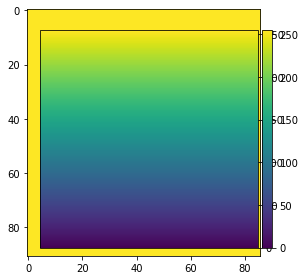

In [10]:
debug_images_path = "/home/leandro/git/amygda/examples/condensation/debug_images/"
for i in range(8):
    for j in range(12):
        condensation_prob = infer_condensation(f"{debug_images_path}well_{i}_{j}_cropped.chosen_hull.cropped.png")
        if condensation_prob >= 0.8:
            print(f"{i}, {j}")

array([[[45.5, 44.5, 14.1]]], dtype=float32)

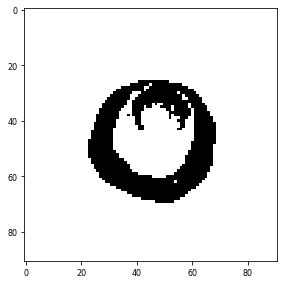

In [370]:
def infer_condensation_v2(path):
    image = read_image(path)
    image_binarised = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY,
                                             43,
                                             10)
    circles=cv2.HoughCircles(image_binarised,cv2.HOUGH_GRADIENT,1,50,param1=20,param2=25,minRadius=2,maxRadius=2000)
    display(circles)
    io.imshow(image_binarised)
infer_condensation_v2("/home/leandro/git/amygda/examples/condensation_3/debug_images/well_7_6_cropped.chosen_hull.cropped.png")

Ratio area_of_hull / area_of_rectangle = 3.914930649308768
Expected ratio = 0.7853981633974483
Probability it is a condensation: -2.9846445175956307


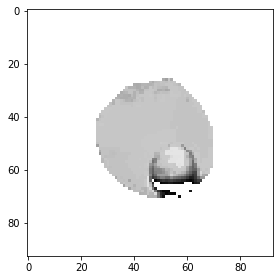

Ratio area_of_hull / area_of_rectangle = 0.8079031405035147
Expected ratio = 0.7853981633974483
Probability it is a condensation: 0.9713457731951967


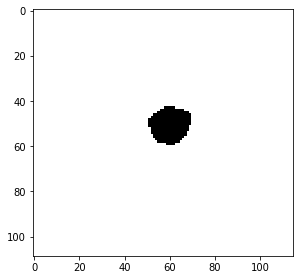

In [331]:
infer_condensation("/home/leandro/git/amygda/examples/sample-images/05/debug_images/well_0_5_cropped.chosen_hull.cropped.png")

CONDENSATION


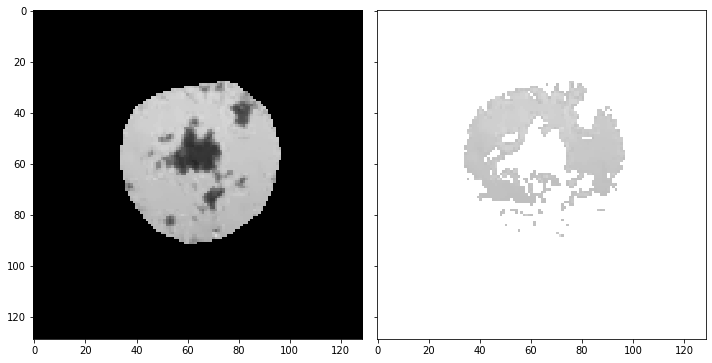

In [202]:
infer_condensation("/home/leandro/git/amygda/examples/sample-images/06/debug_images/well_0_5_cropped.chosen_hull.cropped.png")

CONDENSATION


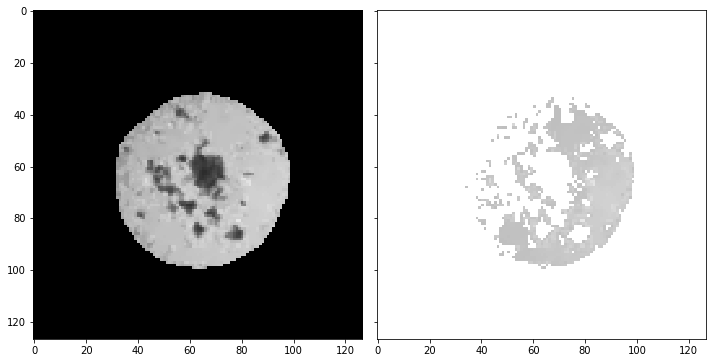

In [203]:
infer_condensation("/home/leandro/git/amygda/examples/sample-images/06/debug_images/well_3_7_cropped.chosen_hull.cropped.png")

CONDENSATION


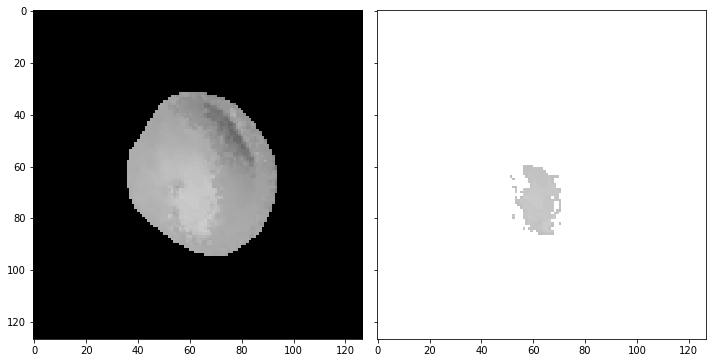

In [204]:
infer_condensation("/home/leandro/git/amygda/examples/sample-images/05/debug_images/well_5_1_cropped.chosen_hull.cropped.png")

CONDENSATION


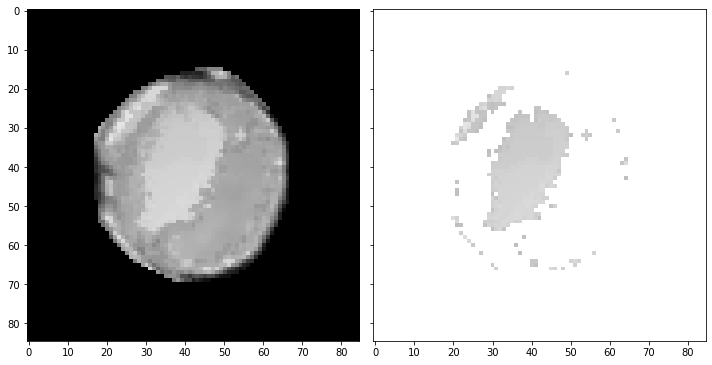

In [205]:
infer_condensation("/home/leandro/git/amygda/examples/10-YA00100048-YA00100048-1/debug_images/well_6_11_cropped.chosen_hull.cropped.png")

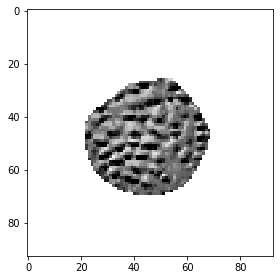

In [152]:
bubbly_image_sharpened = unsharp_mask(bubbly_image, radius=20, amount=1)
io.imshow(bubbly_image_sharpened)

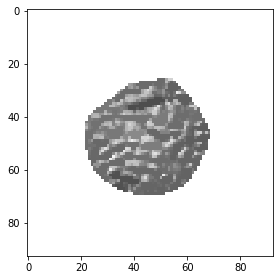

In [157]:
area_closing_bubbly_image_sharpened = skimage.morphology.area_closing(bubbly_image_sharpened, area_threshold=32)
io.imshow(area_closing_bubbly_image_sharpened)

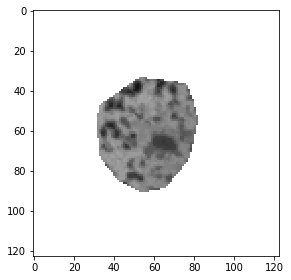

In [140]:
io.imshow(growth_image)

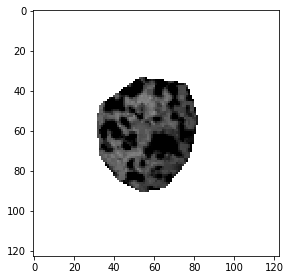

In [141]:
result_1 = unsharp_mask(growth_image, radius=20, amount=1)
io.imshow(result_1)

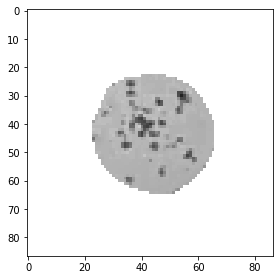

In [142]:
io.imshow(very_dispersed_growth_image)

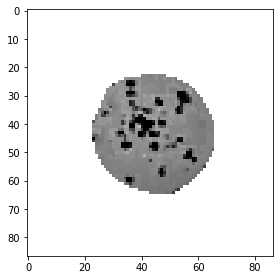

In [158]:
very_dispersed_growth_image_sharpened = unsharp_mask(very_dispersed_growth_image, radius=20, amount=1)
io.imshow(very_dispersed_growth_image_sharpened)

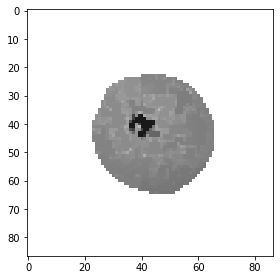

In [159]:
area_closing_very_dispersed_growth_image_sharpened = skimage.morphology.area_closing(very_dispersed_growth_image_sharpened, area_threshold=32)
io.imshow(area_closing_very_dispersed_growth_image_sharpened)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


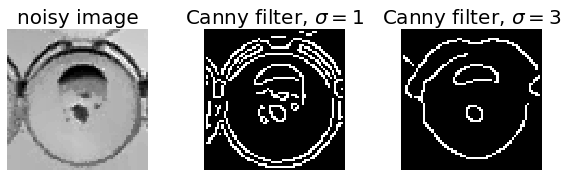

In [429]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature
from skimage.util import img_as_float


# Generate noisy image of a square
im = cv2.imread("/home/leandro/git/amygda/examples/condensation_3/debug_images/well_7_5.raw.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = img_as_float(im)


# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

print(edges2)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title(r'Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()